# K-Means (Unsupervised Learning)

The fundamental idea is:

It organizes data into clusters without requiring predefined labels, allowing for the discovery of inherent data patterns even without specific training information.

The K-means clustering algorithm focuses on 2 main tasks:

1. Finding Optimal Centers (Centroids):


*   Imagine plotting numerous data points on a graph and wanting to group them into clusters.
*   The algorithm initially guesses where these group centers might lie (known as centroids) and iteratively adjusts these guesses to determine the most suitable centroid locations.

2. Assigning Points to the Nearest Center:

*   Subsequently, for each data point, the algorithm identifies the centroid closest to it.
*  All points near a particular centroid are grouped together to form a cluster.
This iterative process continues until the centroids and resulting clusters accurately reflect the natural groupings within the data.




---

### Import Libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Real World Dataset

The dataset includes various specifications of cars, such as miles per gallon (mpg), number of cylinders, engine displacement in cubic inches, horsepower (hp), weight in pounds (weightlbs), time to accelerate from 0 to 60 mph (time-to-60), manufacturing year, and the brand origin.

By using K-means clustering, we can group cars into "K" clusters based on their features such as horsepower and weight. This method helps identify patterns and quickly shows which cars belong to the same group, making it easy to see similarities in their specifications and performance characteristics.



In [ ]:
# Load the dataset
file_path = "/content/drive/My Drive/Machine Learning/cars.csv"
df = pd.read_csv(file_path)

print(df.head())

    mpg  cylinders cubicinches   hp weightlbs  time-to-60  year     brand
0  14.0          8         350  165      4209          12  1972       US.
1  31.9          4          89   71      1925          14  1980   Europe.
2  17.0          8         302  140      3449          11  1971       US.
3  15.0          8         400  150      3761          10  1971       US.
4  30.5          4          98   63      2051          17  1978       US.


In [ ]:
# Convert 'hp' and 'weightlbs' columns to numeric, coercing errors to NaN
df['hp'] = pd.to_numeric(df['hp'], errors='coerce')
df['weightlbs'] = pd.to_numeric(df['weightlbs'], errors='coerce')

# Drop rows with NaN values (if necessary)
df = df.dropna(subset=['hp', 'weightlbs'])


### Choose number of cluster (K) - Change Here

In simple terms we can say choosing number of cluster means how many group you want to have. Try changing the num_cluster and see the visualization for better understanding

In [ ]:
from sklearn.cluster import KMeans
# K-means clustering
num_clusters = 3  # You can choose the number of clusters
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)  # Explicitly setting n_init to suppress warning

# Fit K-means clustering on 'hp' and 'weightlbs' columns
df['Cluster'] = kmeans.fit_predict(df[['hp', 'weightlbs']])

### Visualize the Clustering process

These plots illustrate the progression of the K-means clustering process:
from a raw scatter plot of the data points, through the inclusion of cluster centers (centroids),
to a final plot where individuals are color-coded based on their assigned clusters.

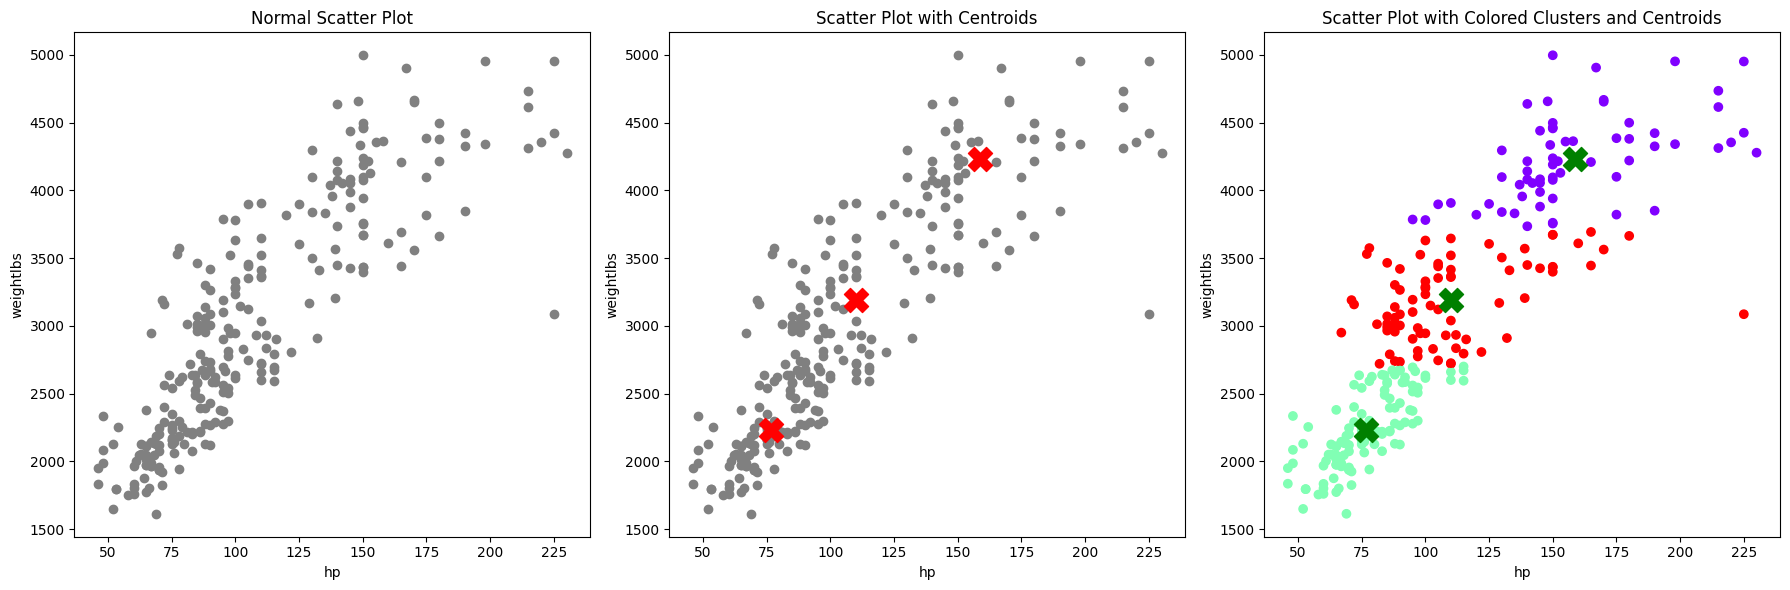

In [ ]:
# Normal Scatter Plot
plt.figure(figsize=(18, 6))

# Plot 1: Normal Scatter Plot
plt.subplot(1, 3, 1)
plt.scatter(df['hp'], df['weightlbs'], c='gray', label='Data Points')
plt.title('Normal Scatter Plot')
plt.xlabel('hp')
plt.ylabel('weightlbs')

# Plot 2: Scatter Plot with Centroids
plt.subplot(1, 3, 2)
plt.scatter(df['hp'], df['weightlbs'], c='gray', label='Data Points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('Scatter Plot with Centroids')
plt.xlabel('hp')
plt.ylabel('weightlbs')

# Plot 3: Scatter Plot with Colored Clusters and Centroids
plt.subplot(1, 3, 3)
plt.scatter(df['hp'], df['weightlbs'], c=df['Cluster'], cmap='rainbow', label='Data Points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='green', marker='X', label='Centroids')
plt.title('Scatter Plot with Colored Clusters and Centroids')
plt.xlabel('hp')
plt.ylabel('weightlbs')

plt.tight_layout()
plt.show()

### Elbow Method to find the optimal Number of Cluster(K)

 The idea is to evaluate the within-cluster sum of squares (WCSS) or inertia for different values of K and observe how it changes. WCSS measures how compactly the data points are grouped within their respective clusters.


In the context of K-means clustering, the Within-Cluster Sum of Squares (WCSS) is often measured using the "inertia" attribute of the KMeans class in scikit-learn. The "inertia" attribute represents the sum of squared distances between each data point and the centroid of its assigned cluster.

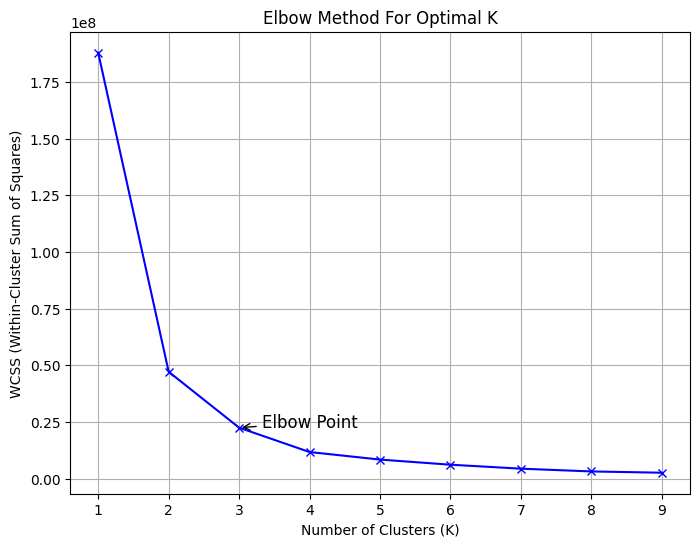

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming df already contains numeric 'hp' and 'weightlbs' columns

WCSS = []  # Within-Cluster Sum of Squares (Inertia)
K = range(1, 10)

for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
    kmeans.fit(df[['hp', 'weightlbs']])
    WCSS.append(kmeans.inertia_)

# Plotting the Elbow method
plt.figure(figsize=(8, 6))
plt.plot(K, WCSS, 'bx-')  # bx - blue color, 'x' marker
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method For Optimal K')
plt.grid(True)

# Annotation for the optimal K
plt.annotate('Elbow Point', xy=(3, WCSS[2]), xytext=(4, WCSS[2] + 2000),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12, ha='center')

plt.show()


### Silhouette Analysis -  Assessing the quality of clusters

- The value of the silhouette coefﬁcient is between [-1, 1].
- A score of 1 denotes the best, meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters.
- The worst value is -1. Values near 0 denote overlapping clusters.

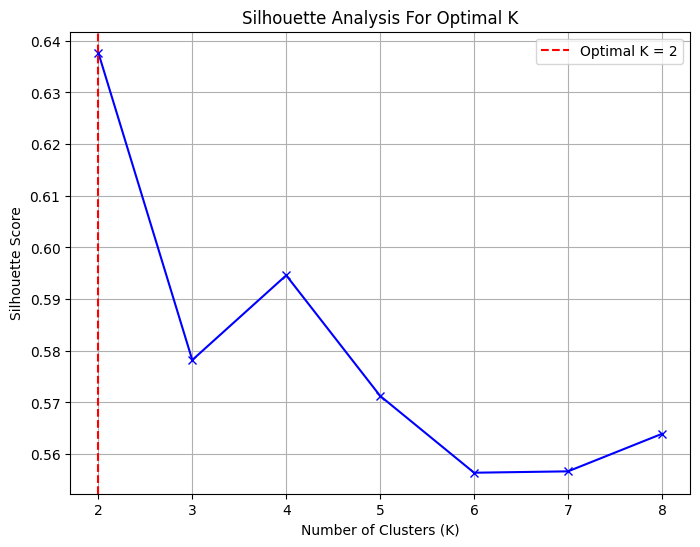

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming df already contains numeric 'hp' and 'weightlbs' columns

# Range of cluster values to evaluate
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]  # Adjust this range as needed

# List to store silhouette scores
silhouette_avg = []

# Iterate over different cluster values
for num_clusters in range_n_clusters:
    # Initialize K-means with explicit n_init to suppress warning
    kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
    # Fit and predict clusters
    cluster_labels = kmeans.fit_predict(df[['hp', 'weightlbs']])
    # Calculate silhouette score
    silhouette_avg.append(silhouette_score(df[['hp', 'weightlbs']], cluster_labels))

# Find the optimal K (highest silhouette score)
optimal_k = range_n_clusters[silhouette_avg.index(max(silhouette_avg))]

# Plotting Silhouette Analysis results
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal K')
plt.grid(True)

# Highlighting the optimal K point
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal K = {optimal_k}')
plt.legend()

plt.show()


The highest Silhoutte score is the best which is 2 here. This would validate the previous elbow method.


#### Elbow Method vs Silhouette Analysis


Elbow Method:

Objective:

* Determine the optimal number of clusters by identifying the "elbow" point, where adding additional clusters results in reduced improvements in clustering quality.

How it functions:

* Plots the within-cluster sum of squares (WCSS) or inertia against the number of clusters and selects the number of clusters (K) at the elbow point.

Silhouette Analysis:

Objective:
* Evaluate the quality and separation of clusters, focusing on how distinct and well-defined the clusters are.


How it functions:


* Computes silhouette scores for each data point and the average score for the entire dataset; higher scores indicate better-defined clusters.




<br><br>
The Elbow Method helps in the initial determination of the number of clusters by identifying the point of diminishing returns, while Silhouette Analysis validates and refines this choice by assessing cluster cohesion and separation. Together, these methods provide a thorough evaluation of clustering quality.

---

### Constrained K-Means: Controlling Group Size

Constrained K-Means optimally divides data into clusters while considering size constraints (min and max) for each group. This nuanced approach ensures effective clustering, balancing traditional within-cluster optimization with size limitations.

Real Life example: <br> <br>
Imagine a car dealership organizing their inventory. They have a variety of cars with different specifications, and they want to create clusters for display or promotional purposes. However, each display area can only hold a certain number of cars, and they want to ensure a minimum number of cars in each area to maintain a diverse selection.

Constrained K-Means helps efficiently assign cars to display areas, meeting both the minimum and maximum car counts for each area. This optimizes space utilization and ensures that customers see a well-balanced selection of cars in each display area.

#### Generate synthetic data with 2 distinct cluster

In [ ]:
pip install k-means-constrained


In [ ]:
import numpy as np
import pandas as pd
from k_means_constrained import KMeansConstrained

# Set random seed for reproducibility
np.random.seed(0)

# Generate synthetic data for two distinct clusters
cluster_a = np.random.normal(loc=[5, 5], scale=[1, 1], size=(20, 2))
cluster_b = np.random.normal(loc=[10, 10], scale=[1, 1], size=(30, 2))

# Combine the data from both clusters
combined_data = np.vstack((cluster_a, cluster_b))

# Convert to a DataFrame
data_frame = pd.DataFrame(combined_data, columns=['Feature1', 'Feature2'])

# Output the total number of samples
num_samples = combined_data.shape[0]
print("Total number of data samples:", num_samples)


Total number of data samples: 50


#### Fit the KMeansConstrained model (CHANGE the attribute to experiment)

you can change:
- number of cluster
- min size
- max size <br>
but please aware the total number of data samples above

In [ ]:
from k_means_constrained import KMeansConstrained

# Instantiate the KMeansConstrained model with parameters:
#   - n_clusters: Number of clusters to form
#   - size_min: Minimum allowed cluster size
#   - size_max: Maximum allowed cluster size
#   - random_state: Random seed for reproducibility

# Ensure that size_min * n_clusters <= total number of samples
# Ensure that size_max * n_clusters >= total number of samples
kmeans_model = KMeansConstrained(n_clusters=4, size_min=12, size_max=20, random_state=42)

# Fit the model and predict cluster assignments for the DataFrame 'data_frame'
cluster_labels = kmeans_model.fit_predict(data_frame)


#### Visualizing the results of the constrained K-means clustering

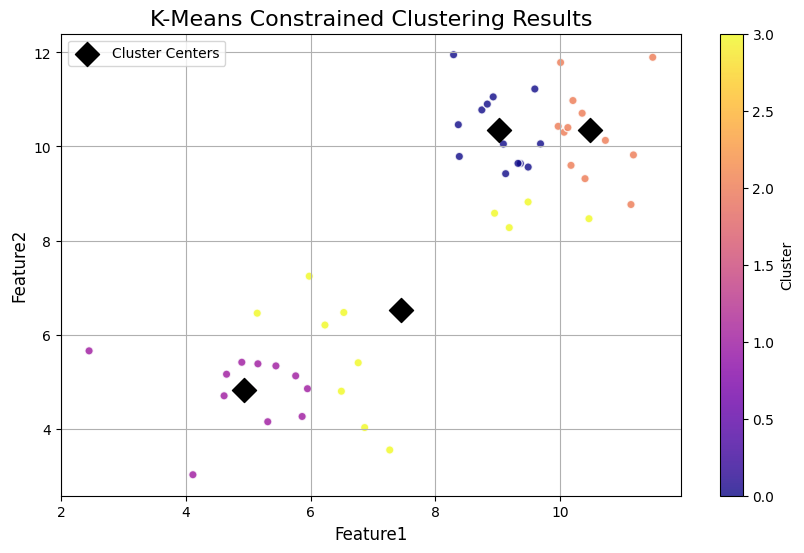

Cluster Centers:
 [[ 9.02544354 10.35084471]
 [ 4.93783049  4.81968141]
 [10.48797327 10.34378385]
 [ 7.44787113  6.52225703]]

Cluster Labels:
 [3 3 3 1 1 3 1 1 3 1 1 1 3 1 3 1 1 1 3 1 3 0 0 0 0 0 3 2 2 0 0 3 2 0 0 2 2
 2 0 0 0 3 2 2 0 0 2 2 2 2]


In [ ]:
import matplotlib.pyplot as plt

# Plot the data points with cluster assignments
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data_frame['Feature1'], data_frame['Feature2'], c=cluster_labels, cmap='plasma', edgecolor='w', alpha=0.8)
plt.colorbar(scatter, label='Cluster')

# Mark the cluster centers with a distinct style
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1],
            c='black', marker='D', s=150, label='Cluster Centers')

# Add title and labels
plt.title('K-Means Constrained Clustering Results', fontsize=16)
plt.xlabel('Feature1', fontsize=12)
plt.ylabel('Feature2', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Output cluster centers and labels
print("Cluster Centers:\n", kmeans_model.cluster_centers_)
print("\nCluster Labels:\n", cluster_labels)


---
### Evaluating Clustering Performance Using Advanced Techniques

Here we are evaluating K-means with other clustering method. We use DBSCAN for Example.

Basic info about DBSCAN

Density-Based Clustering:
- DBSCAN groups points that are close to each other based on the idea of density.
It forms clusters where points are densely packed, and it's okay with different shapes.

Parameters:
- Epsilon (eps): Maximum distance to look for nearby points.
- Min Samples (min_samples): Minimum points needed to form a dense cluster.

Suitable Data:
- Best for spatial data, like locations on a map.
- Handles clusters of different shapes and sizes.
- Good for finding outliers (unusual points).

Advantages and Usage:
- No Need for Predefined Clusters:
  - DBSCAN figures out the number of clusters on its own.
- Common Uses:
  - Geospatial clustering, anomaly detection, image segmentation, and customer segmentation.

In summary, DBSCAN is a smart clustering tool that finds groups in data based on how densely points are packed.
It's great for spatial data and doesn't need you to tell it how many groups there are.
Adjusting eps and min_samples helps it work well for different situations.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


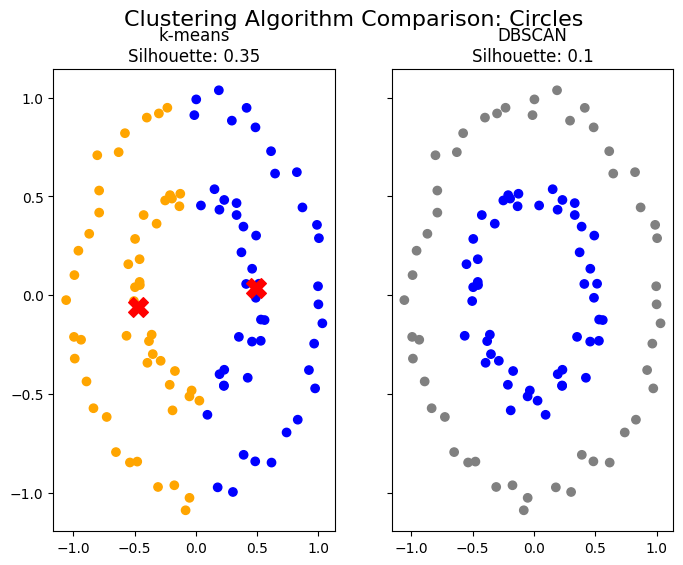

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_circles
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Generate circular-shaped data
X, _ = make_circles(n_samples=100, factor=0.5, noise=0.05)

# Create a DataFrame with hp and weightlbs as columns
df = pd.DataFrame(X, columns=['hp', 'weightlbs'])

# Clustering using k-means with 2 clusters
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['KMeans_Labels'] = kmeans.fit_predict(df[['hp', 'weightlbs']])

# Clustering using DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
df['DBSCAN_Labels'] = dbscan.fit_predict(df[['hp', 'weightlbs']])

# Calculate silhouette scores
kmeans_silhouette = silhouette_score(df[['hp', 'weightlbs']], df['KMeans_Labels']).round(2)
dbscan_silhouette = silhouette_score(df[['hp', 'weightlbs']], df['DBSCAN_Labels']).round(2)

# Visualize the circular-shaped clusters
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharex=True, sharey=True)
fig.suptitle(f"Clustering Algorithm Comparison: Circles", fontsize=16)

# Define custom colors for the clusters
custom_colors = ['blue', 'orange']

# The k-means plot
ax1.scatter(df['hp'], df['weightlbs'], c=[custom_colors[label] for label in df['KMeans_Labels']])
ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='X', c='red', label='Centroids')
ax1.set_title(f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12})

# The dbscan plot
# Handle noise points in DBSCAN
dbscan_colors = [custom_colors[label] if label != -1 else 'grey' for label in df['DBSCAN_Labels']]
ax2.scatter(df['hp'], df['weightlbs'], c=dbscan_colors)
ax2.set_title(f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12})

plt.show()


#### What can we obeserve here ?

On the left, K-Means had difficulty interpreting the circular shapes in our data (Silhouette score: 0.35). It incorrectly assigned some points to the wrong clusters, indicated by the confusion in the orange and blue clusters, and the red 'X' marks (centroids).

On the right, DBSCAN more effectively identified the circular shapes (Silhouette score: 0.01). Despite the lower score, it more accurately grouped the points according to their natural arrangement. Some points are labeled as noise, but overall, it better captures the true clusters.

K-Means struggles with circular patterns because it assumes clusters are spherical, whereas DBSCAN is more adaptable to different cluster shapes. Although K-Means had a higher score, DBSCAN offers a more logical grouping for this data. This highlights the importance of selecting the appropriate method based on the data's shape.



---
#### For this dataset which clustering method should we use ?

In this dataset with circular patterns, DBSCAN performs better than K-Means. Although K-Means achieved a higher score, it had difficulty with the circular shapes, misclassifying some points. Conversely, DBSCAN more accurately captured the natural structure of the data, correctly grouping points within the crescents. Therefore, for this type of data, DBSCAN is the preferred method.



source : <br>
https://www.kaggle.com/datasets/abineshkumark/carsdata <br>
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html <br>
https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/ <br>
https://www.mathworks.com/help/stats/kmeans.html<br>
https://www.simplilearn.com/tutorials/machine-learning-tutorial/k-means-clustering-algorithm<br>